In [ ]:
# !pip install yfinance

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Addressing **user story #2** - Valuation analysis, a retail trader wishes to compare key metrics of booming tech stocks (magnificent 7), specfically metrics such as P/E ratio, earnings growth, and revenue growth side-by-side

In [4]:
mag7_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA']

# 1 year of daily closing prices
start = "2016-01-01"
end = "2026-02-11"
data = yf.download(mag7_tickers, start=start, end=end)['Close']
print(f"Data shape: {data.shape}")
data.head()

[*********************100%***********************]  7 of 7 completed

Data shape: (2541, 7)


Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2016-01-04,23.730949,31.849501,37.687248,101.510925,47.983456,0.789588,14.894000
2016-01-05,23.136263,31.689501,37.790966,102.017380,48.202362,0.802272,14.895333
2016-01-06,22.683489,31.632500,37.681786,102.255699,47.326756,0.769098,14.602667
2016-01-07,21.726154,30.396999,36.772160,97.240746,45.680603,0.738607,14.376667
2016-01-08,21.841038,30.352501,36.271446,96.654846,45.820713,0.722752,14.066667


In [6]:
data.to_csv("../data/raw.csv")

In [7]:
spy = yf.download("SPY", start=start, end=end)['Close']
spy.head()

[*********************100%***********************]  1 of 1 completed


Ticker,SPY
Date,
2016-01-04,170.372162
2016-01-05,170.660355
2016-01-06,168.507553
2016-01-07,164.464813
2016-01-08,162.659561


In [8]:
spy.to_csv("../data/spy.csv", index=True)

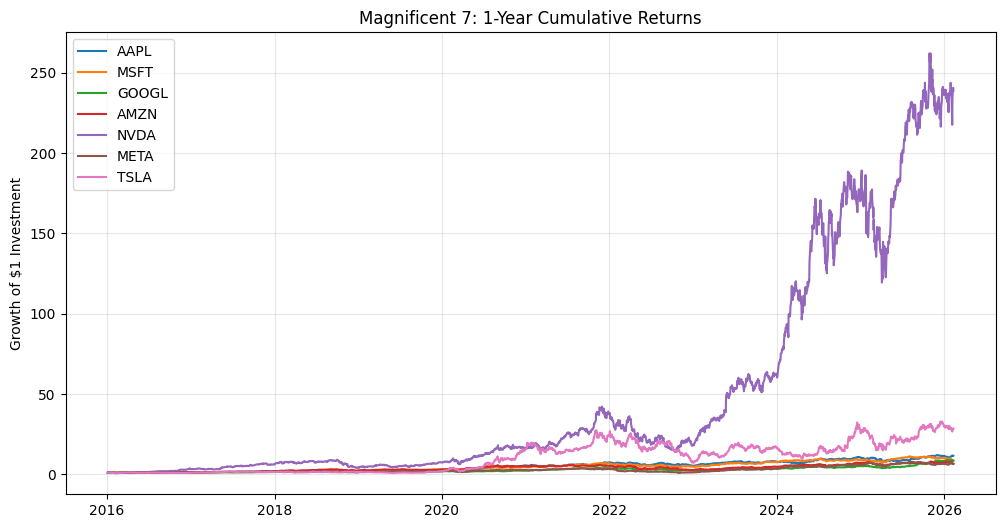

In [5]:
#  daily returns and cumulative returns
daily_returns = data.pct_change()
cumulative_returns = (1 + daily_returns).cumprod()

# performance
plt.figure(figsize=(12, 6))
for ticker in mag7_tickers:
    plt.plot(cumulative_returns[ticker], label=ticker)

plt.title("Magnificent 7: 1-Year Cumulative Returns")
plt.ylabel("Growth of $1 Investment")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


C:\Users\tiffa\AppData\Local\Temp\ipykernel_90024\3335235979.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(stats['Annualized Volatility'][i] + 0.01, stats['Annualized Return'][i], ticker)


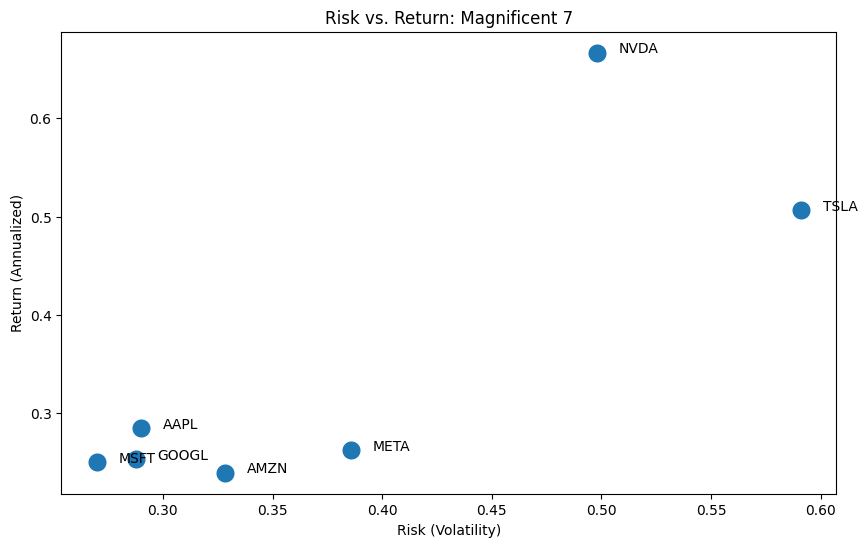

In [6]:
import seaborn as sns

#mean returns and volatility
stats = pd.DataFrame({
    'Annualized Return': daily_returns.mean() * 252,
    'Annualized Volatility': daily_returns.std() * (252**0.5)
})

# Scatter plot for Risk-Reward
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stats, x='Annualized Volatility', y='Annualized Return', s=200)

for i, ticker in enumerate(stats.index):
    plt.text(stats['Annualized Volatility'][i] + 0.01, stats['Annualized Return'][i], ticker)

plt.title("Risk vs. Return: Magnificent 7")
plt.xlabel("Risk (Volatility)")
plt.ylabel("Return (Annualized)")
plt.show()


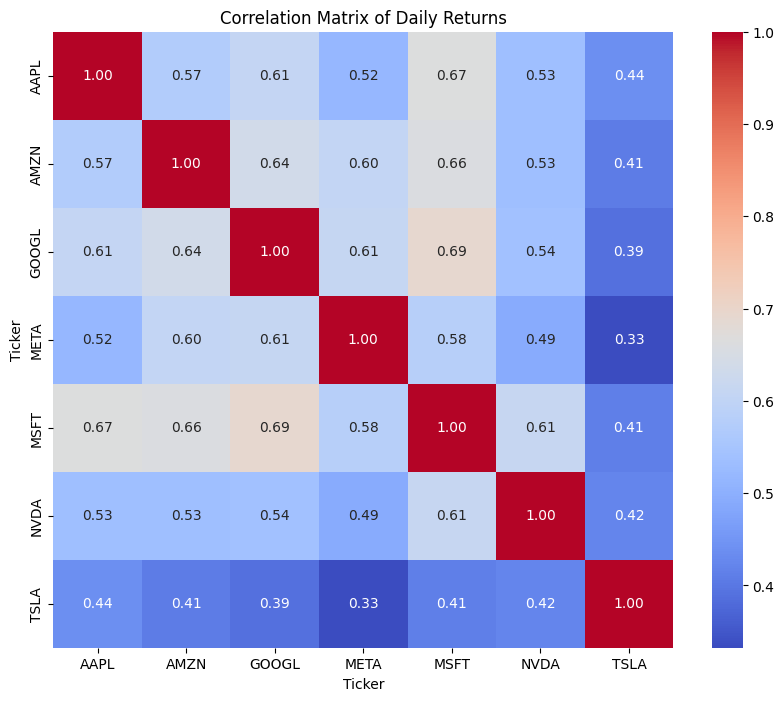

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Daily Returns")
plt.show()


In [ ]:
# Tickers for the Magnificent Seven
# mag7_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA']

# List to store fundamental data
fundamentals = []

for ticker in mag7_tickers:
    stock = yf.Ticker(ticker)
    info = stock.info
    
    fundamentals.append({
        'Ticker': ticker,
        'P/E Ratio (Trailing)': info.get('trailingPE'),
        'Forward P/E': info.get('forwardPE'),
        'Revenue Growth (%)': info.get('revenueGrowth', 0) * 100,
        'Earnings Growth (%)': info.get('earningsGrowth', 0) * 100,
        'Profit Margin (%)': info.get('profitMargins', 0) * 100
    })

df_metrics = pd.DataFrame(fundamentals).set_index('Ticker')

display(df_metrics.round(2))


--- Magnificent 7 Fundamental Comparison ---


,P/E Ratio (Trailing),Forward P/E,Revenue Growth (%),Earnings Growth (%),Profit Margin (%)
Ticker,,,,,
AAPL,34.83,29.65,15.7,18.3,27.04
MSFT,25.32,21.45,16.7,59.8,39.04
GOOGL,28.74,23.29,18.0,31.1,32.81
AMZN,28.52,21.92,13.6,5.0,10.83
NVDA,46.68,24.61,62.5,66.7,53.01
META,28.49,18.75,23.8,10.7,30.08
TSLA,400.57,152.84,-3.1,-60.6,4.00


C:\Users\tiffa\AppData\Local\Temp\ipykernel_90024\3796031369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_metrics.index, y='P/E Ratio (Trailing)', data=df_metrics, palette='viridis')


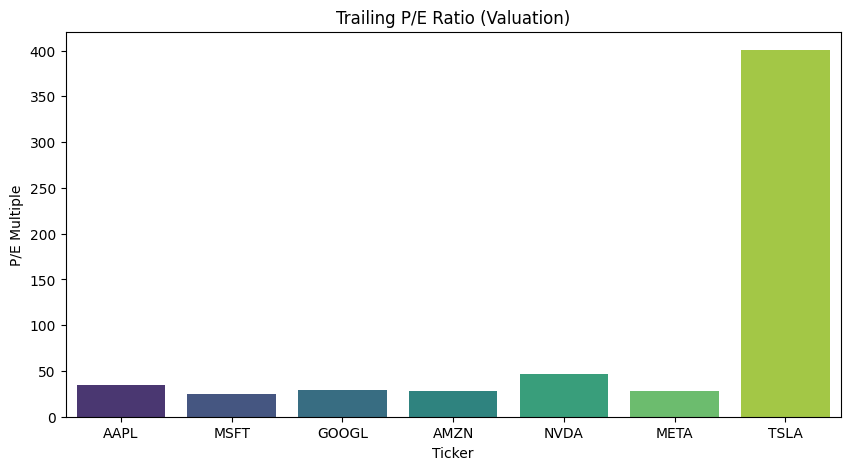

C:\Users\tiffa\AppData\Local\Temp\ipykernel_90024\3796031369.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_metrics.index, y='Revenue Growth (%)', data=df_metrics, palette='magma')


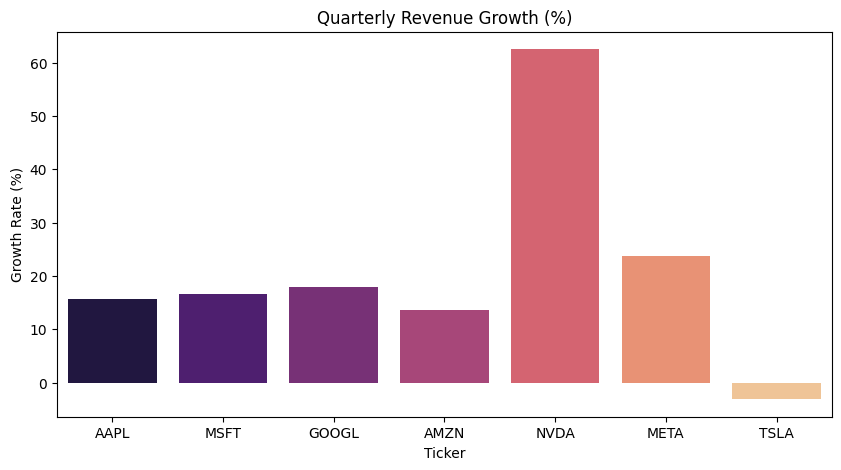

In [ ]:


#trailing P/E Ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=df_metrics.index, y='P/E Ratio (Trailing)', data=df_metrics, palette='viridis')
plt.title('Trailing P/E Ratio (Valuation)')
plt.ylabel('P/E Multiple')
plt.show()

# revenue Growth
plt.figure(figsize=(10, 5))
sns.barplot(x=df_metrics.index, y='Revenue Growth (%)', data=df_metrics, palette='magma')
plt.title('Quarterly Revenue Growth (%)')
plt.ylabel('Growth Rate (%)')
plt.show()
